#### Intro

this dataset with 768 samples and 9 columns is famous for having noisy datapoints
high number of missing values for such small dataset,  
imbalanced outputs  and low data quality which can affect the performance of machine learning models.  
i choose this dataset because it is challenging  and i wanted to learn more about Binary(classification) problems.


Problem:
predicting whether a person has diabetes or not
It contains medical data from women of pima indian heritage,  
specifically focusing on various health measurements like:

1. pregnancies: Number of pregnancies the patient has had  
2. Glucose: Plasma glucose concentration a 2 hours in an Oral Glucose Tolerance Test (OGTT)
3. BMI: Body mass index (weight in kg/(height in m)^2)
4. DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history
5. Age: Age of the patient (years)
6. BloodPressure: Diastolic blood pressure (mm Hg)
7. SkinThickness: Triceps skin fold thickness (mm)
8. Insulin: 2-Hour serum insulin (mu U/ml)  
Target. Outcome: (0 or 1). 0 for Healthy, 1 for Positive Diabetes diagnoses  
Class distribution:
0 : 500 ,  1 : 268

### Exploratory Data Analysis (EDA) for Diabetes dataset

#### Step 1: Load and Initial Inspection

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Administrator\Desktop\JUPYTER\RAW Files\diabetes.csv', low_memory=False)
data = data.rename(columns={'Outcome': 'Diabetes'})
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Step 2: Handling Invalid Zeros
#### These Features Cannot be: 0, We Assume Them as Empty

In [8]:
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Diabetes                      0
dtype: int64

In [9]:
dd = data.copy() # Raw Data Points For Pair Plot, Just Replaced 0 with nan

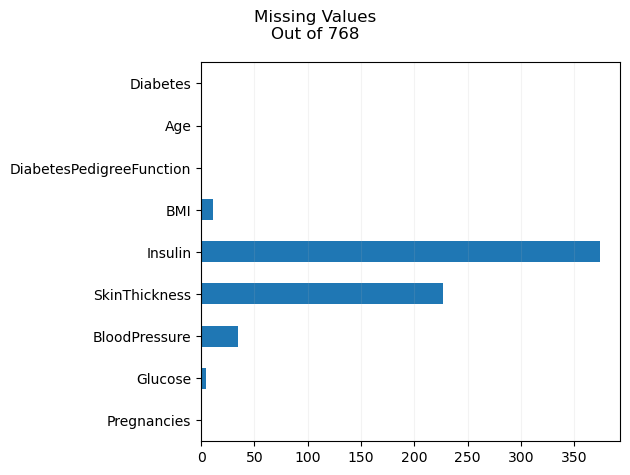

In [10]:
pp = data.isnull().sum().plot(kind='barh')
pp.figure.suptitle('Missing Values\nOut of 768')
pp.grid(axis='x', alpha=0.15)
pp.figure.tight_layout()
pp.figure.savefig('Missing Values.png')

#### Replace missing values with Median, because of High Variance in SkinThickness and Insulin
####  These Columns also have the Most Missing Values

In [11]:
imputer = data.median(numeric_only=True)
data_before = data.copy() #data with null values
data = data.fillna(imputer)

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [12]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


### Step 3: Outliers

#### Detection

In [13]:
numeric_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

inirial_rows = data.shape[0]
kept = inirial_rows
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR     #  Multiplier is 1.5 we will adjust to our need later with its Function
    upper_bound = Q3 + 1.5 * IQR
    
    mask = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    dropped = kept - mask.shape[0]
    kept = mask.shape[0]
    print(f'{col}:\n dropped Rows: {dropped}\n kept Rows: {kept}\n Remaining: {100*kept /inirial_rows:.1f}%\n')

Glucose:
 dropped Rows: 0
 kept Rows: 768
 Remaining: 100.0%

BloodPressure:
 dropped Rows: 14
 kept Rows: 754
 Remaining: 98.2%

SkinThickness:
 dropped Rows: 73
 kept Rows: 681
 Remaining: 88.7%

Insulin:
 dropped Rows: 259
 kept Rows: 422
 Remaining: 54.9%

BMI:
 dropped Rows: -338
 kept Rows: 760
 Remaining: 99.0%

DiabetesPedigreeFunction:
 dropped Rows: 21
 kept Rows: 739
 Remaining: 96.2%

Age:
 dropped Rows: -20
 kept Rows: 759
 Remaining: 98.8%



These Results Can and Will be Optimized with a Function for Outlier Detection  

#### Clipping Outliers
##### Define its Function

In [14]:
def clip_columns_with_custom_iqr(df, settings):
    
    df = df.copy()
    for col, (multiplier_lower, multiplier_upper) in settings.items():
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier_lower * IQR
        upper_bound = Q3 + multiplier_upper  * IQR
        
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [15]:
outlier_settings = {
    'Pregnancies':              (1.0,  1.5),
    'Glucose':                  (0.7,  1.3),
    'BloodPressure':            (1.2,  1.3),
    'SkinThickness':            (99.0, 3.0),
    'Insulin':                  (99.0, 2.7),
    'BMI':                      (4.0,  1.4),
    'DiabetesPedigreeFunction': (4.0,  1.7),
    'Age':                      (4.0,  1.5),
}

df_clean = clip_columns_with_custom_iqr(data, outlier_settings)

### Step 4: Visualizations

#### 4.1: Distribution Plots (Histograms with KDE)

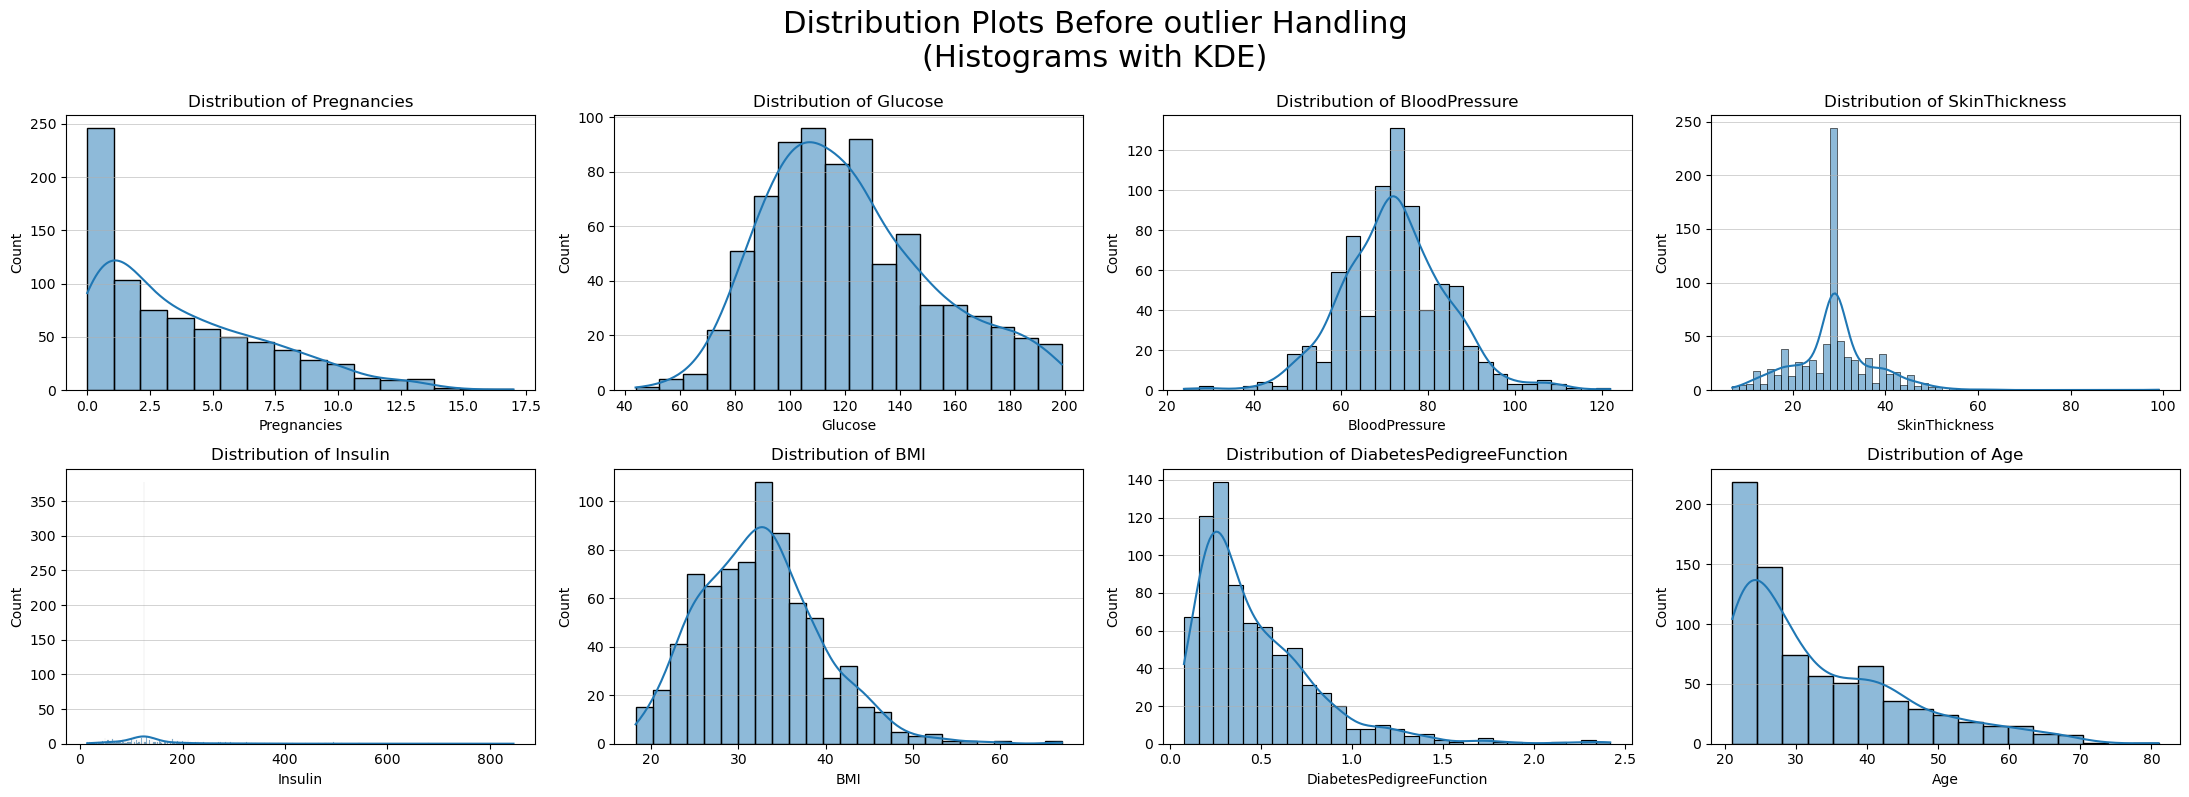

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(22, 8))
fig.suptitle('Distribution Plots Before outlier Handling\n(Histograms with KDE)', fontsize=22, y=.99)

for ax, col in zip(axes.flatten(), data.columns.drop('Diabetes')):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.grid(axis='y', linewidth=.4)
plt.tight_layout()
plt.savefig('Distribution Plots Before outlier Handling(Histograms with KDE).png')
plt.show()

Insulin has extreme standard deviation and so has SkinThikness  
Compare Features With After Removing Outliers

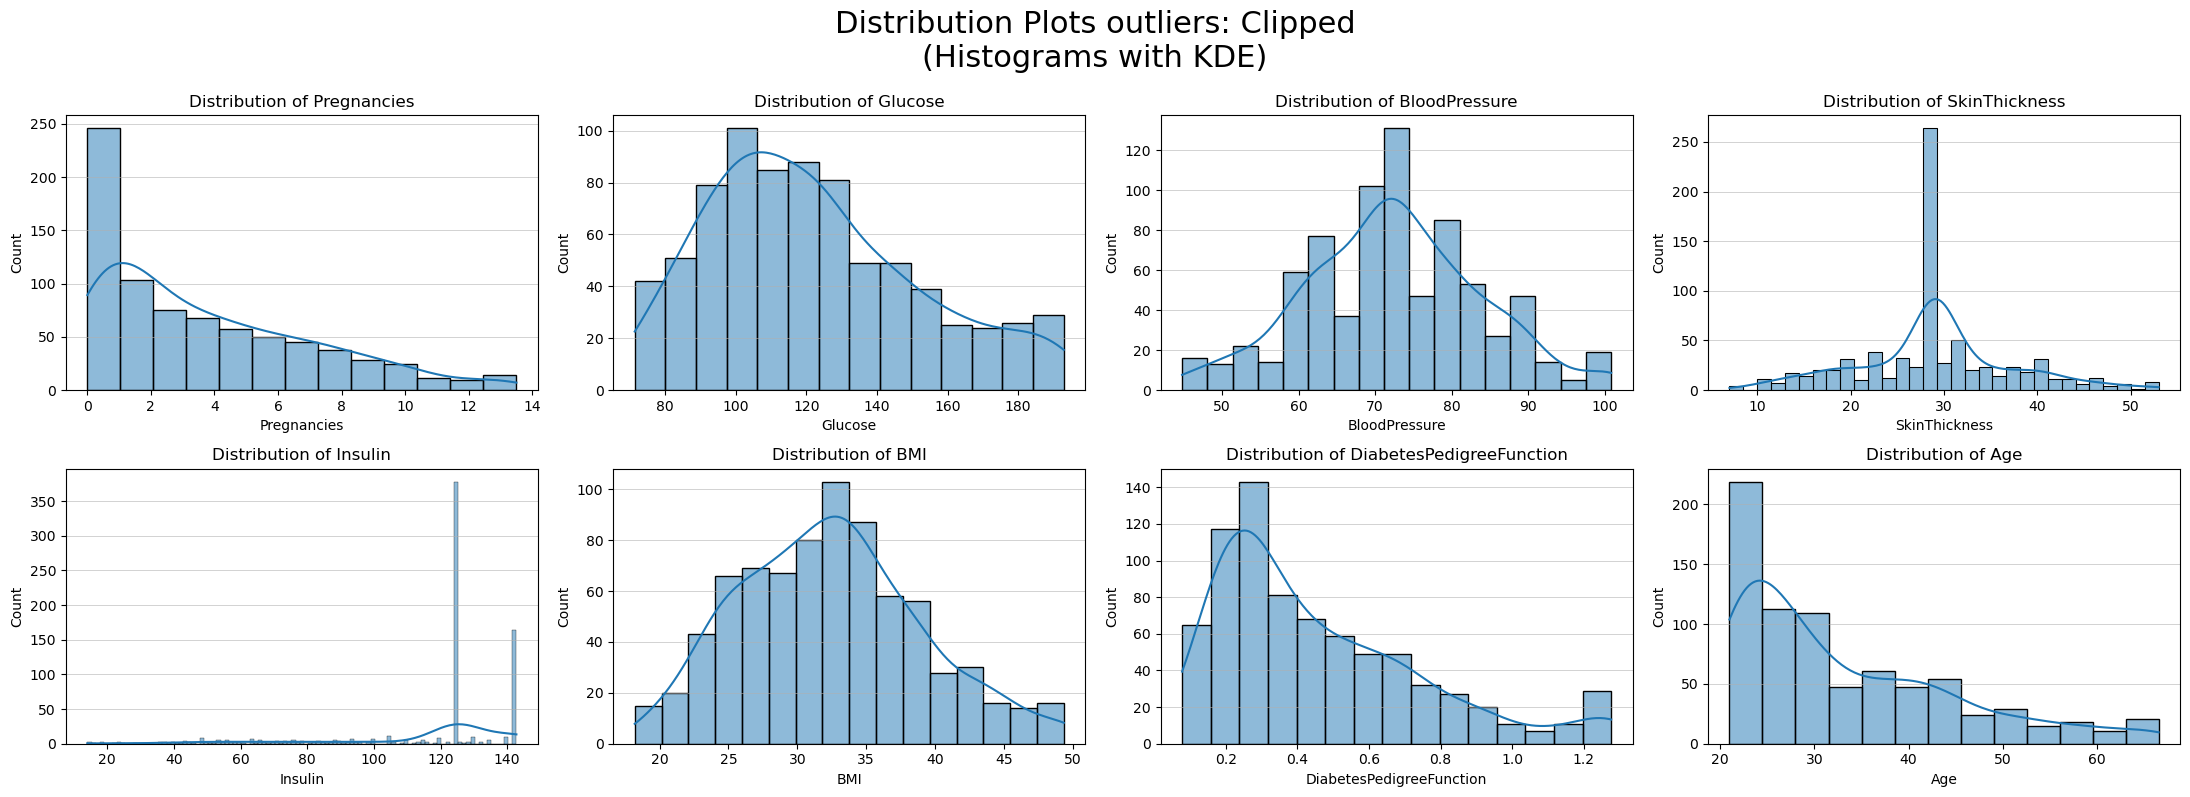

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(22, 8))
fig.suptitle('Distribution Plots outliers: Clipped\n(Histograms with KDE)', fontsize=22, y=.99)

for ax, col in zip(axes.flatten(), df_clean.columns.drop('Diabetes')):
    sns.histplot(df_clean[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.grid(axis='y', linewidth=.4)
plt.tight_layout()
plt.savefig('Distribution Plots outliers Clipped (Histograms with KDE).png')
plt.show()

#### 4.2.1: Boxplots for Outliers

##### (Pre-Clipping Check)

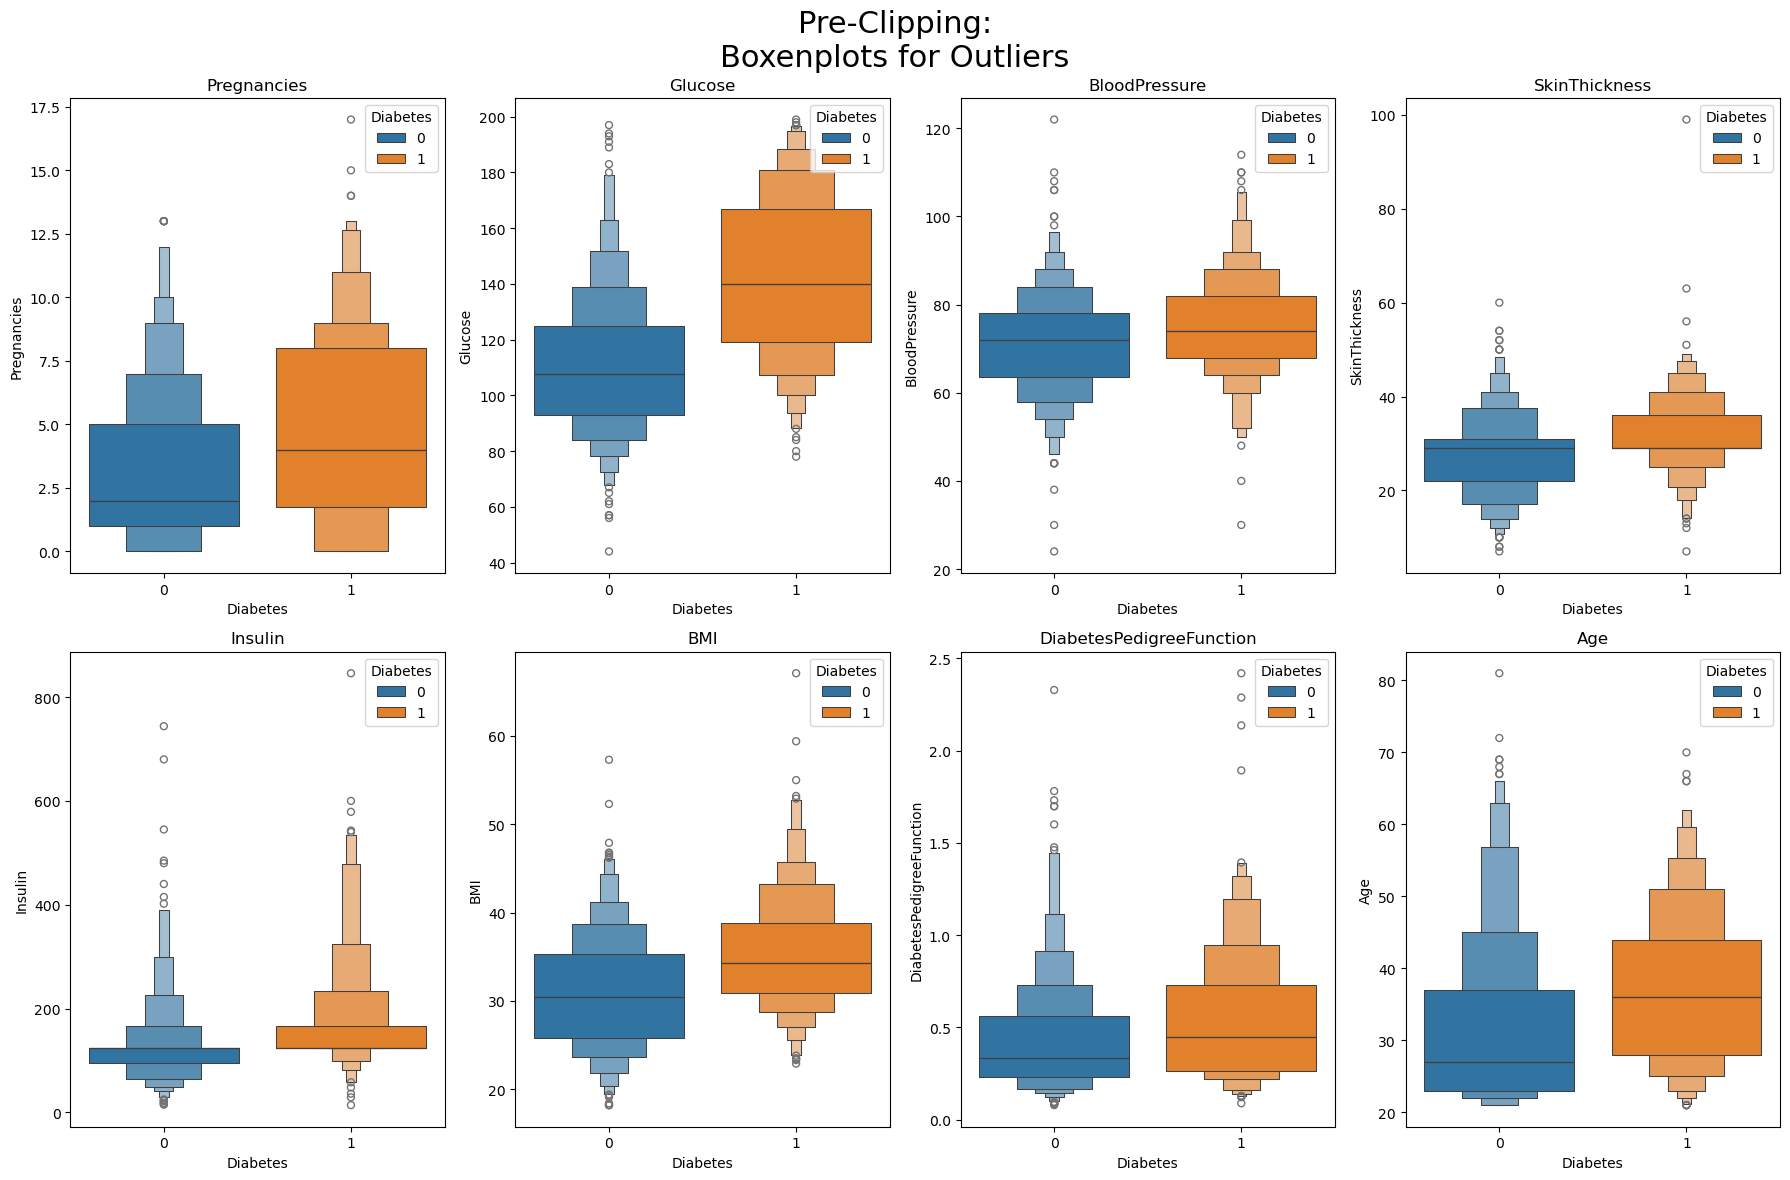

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(18,12))
plt.suptitle('Pre-Clipping:\nBoxenplots for Outliers', fontsize= 22)
for ax, col in zip(axes.flatten(), data.columns.drop('Diabetes')):
    sns.boxenplot(x=data['Diabetes'], y=data[col], hue=data['Diabetes'], ax=ax)
    ax.set_title(f'{col}')

plt.tight_layout()
plt.savefig('Boxenplots for Outliers Pre-Clipping.png')
plt.show()

##### (Post-Removal Check)

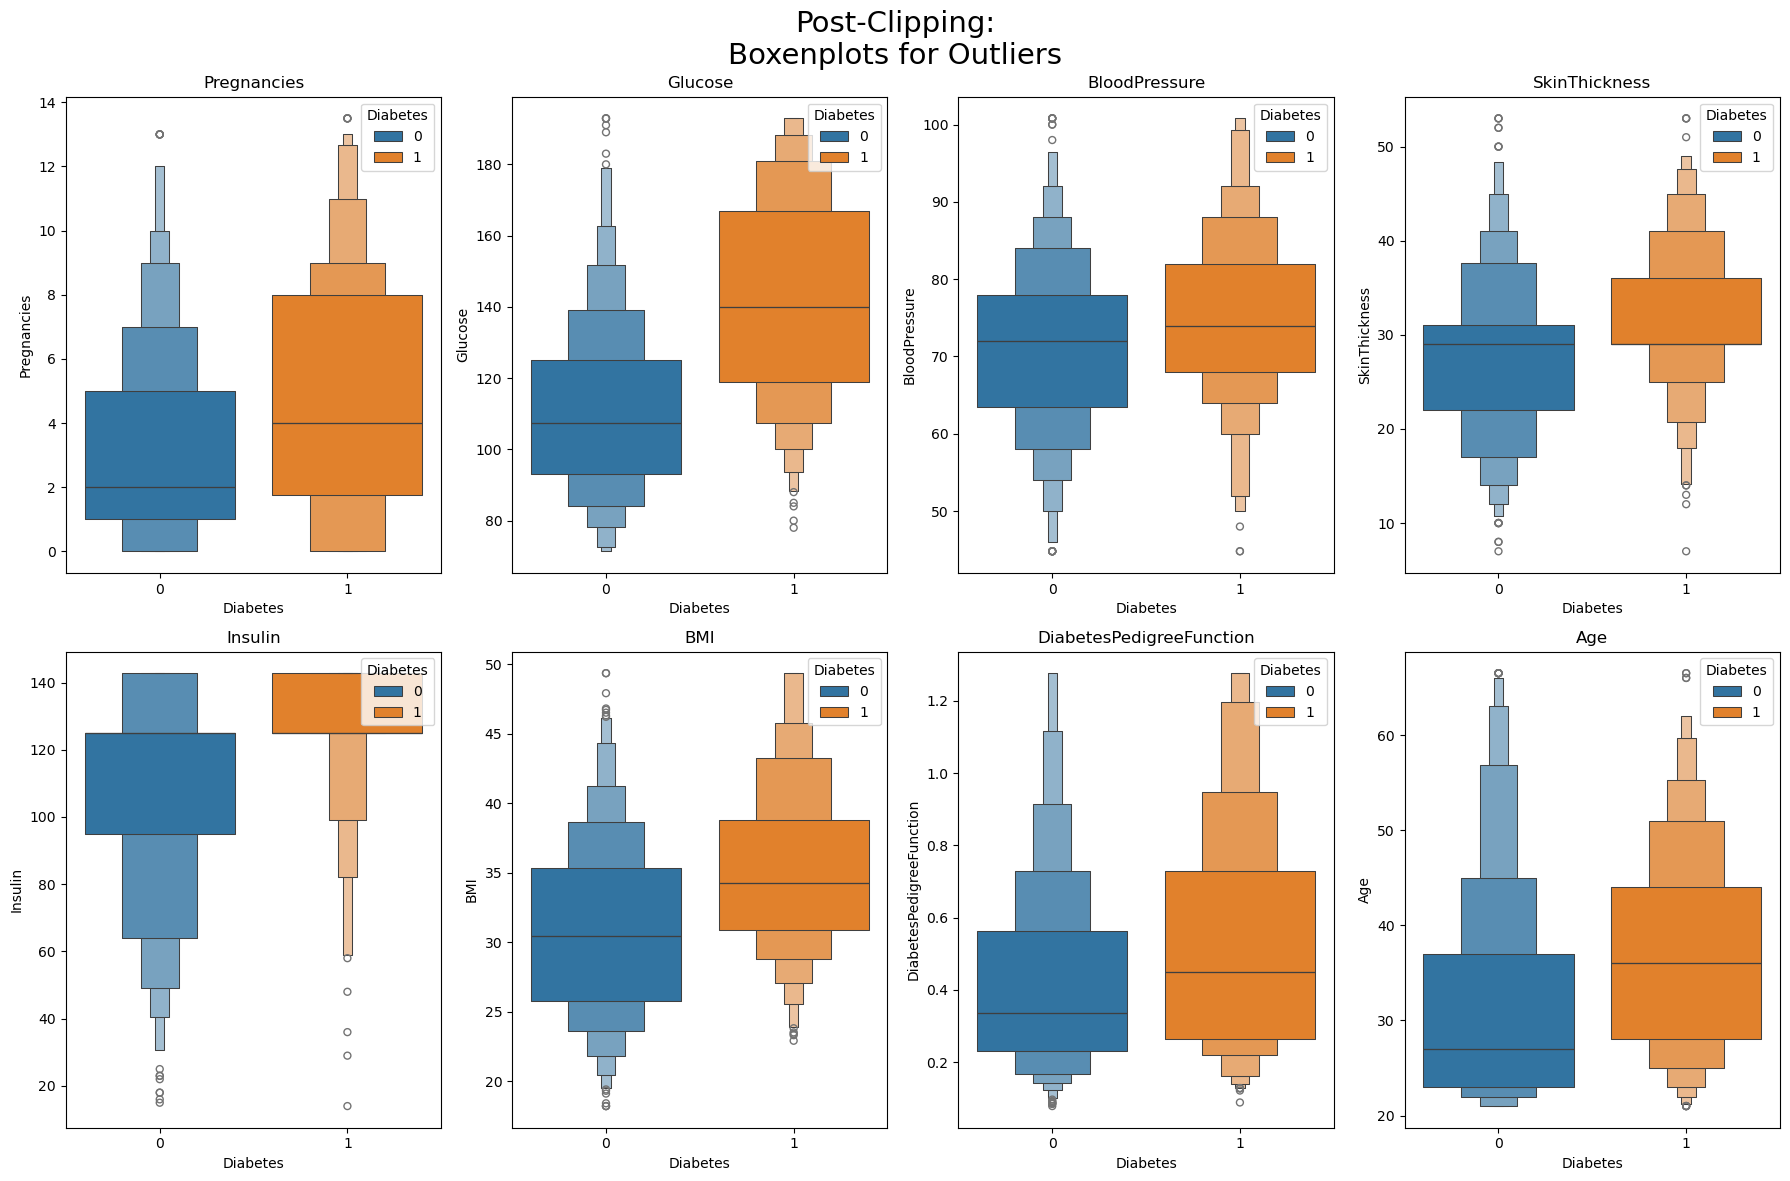

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(18,12))
plt.suptitle('Post-Clipping:\nBoxenplots for Outliers', fontsize= 21)

for ax, col in zip(axes.flatten(), df_clean.columns.drop('Diabetes')):
    sns.boxenplot(x=df_clean['Diabetes'], y=df_clean[col], hue=df_clean['Diabetes'], ax=ax)
    ax.set_title(f'{col}')

plt.tight_layout()
plt.savefig('Boxenplots for Outliers Post-Clipping.png')
plt.show()

#### 4.3: Correlation Heatmap

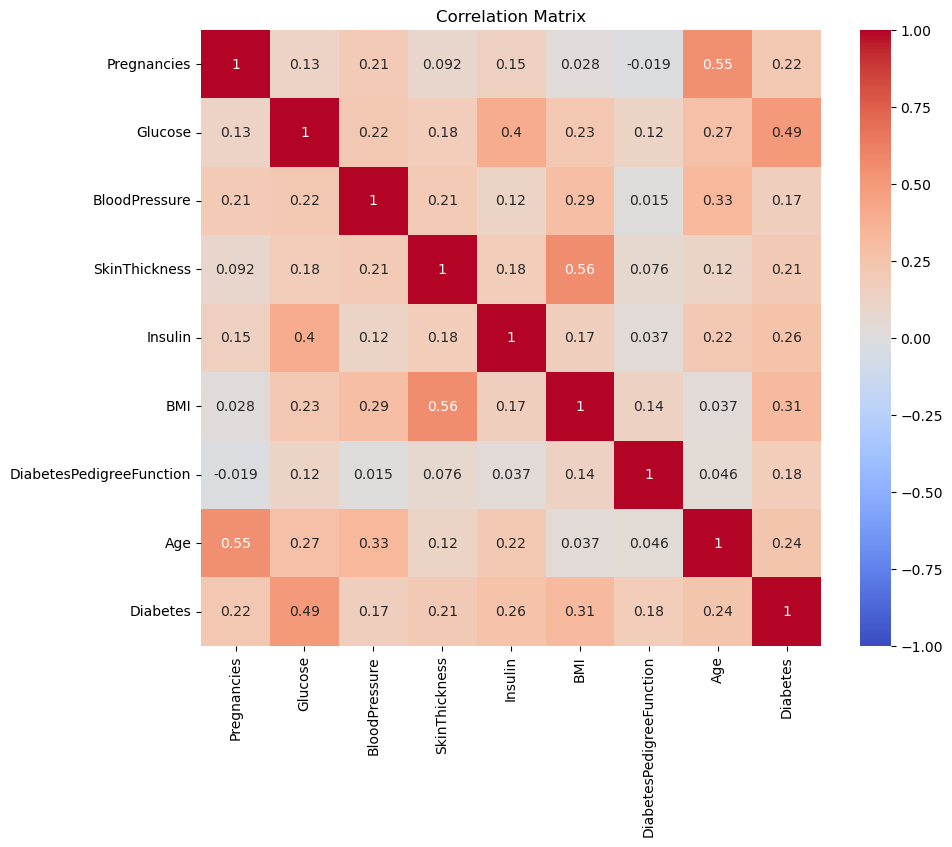

In [20]:
plt.figure(figsize=(10, 8))
corr = df_clean.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix for Diabetes features')
plt.show()

Glucose and BMI have the Most Correlation with Diabetes.

#### 4.4: Pairplot for Relationships (Colored by Target)

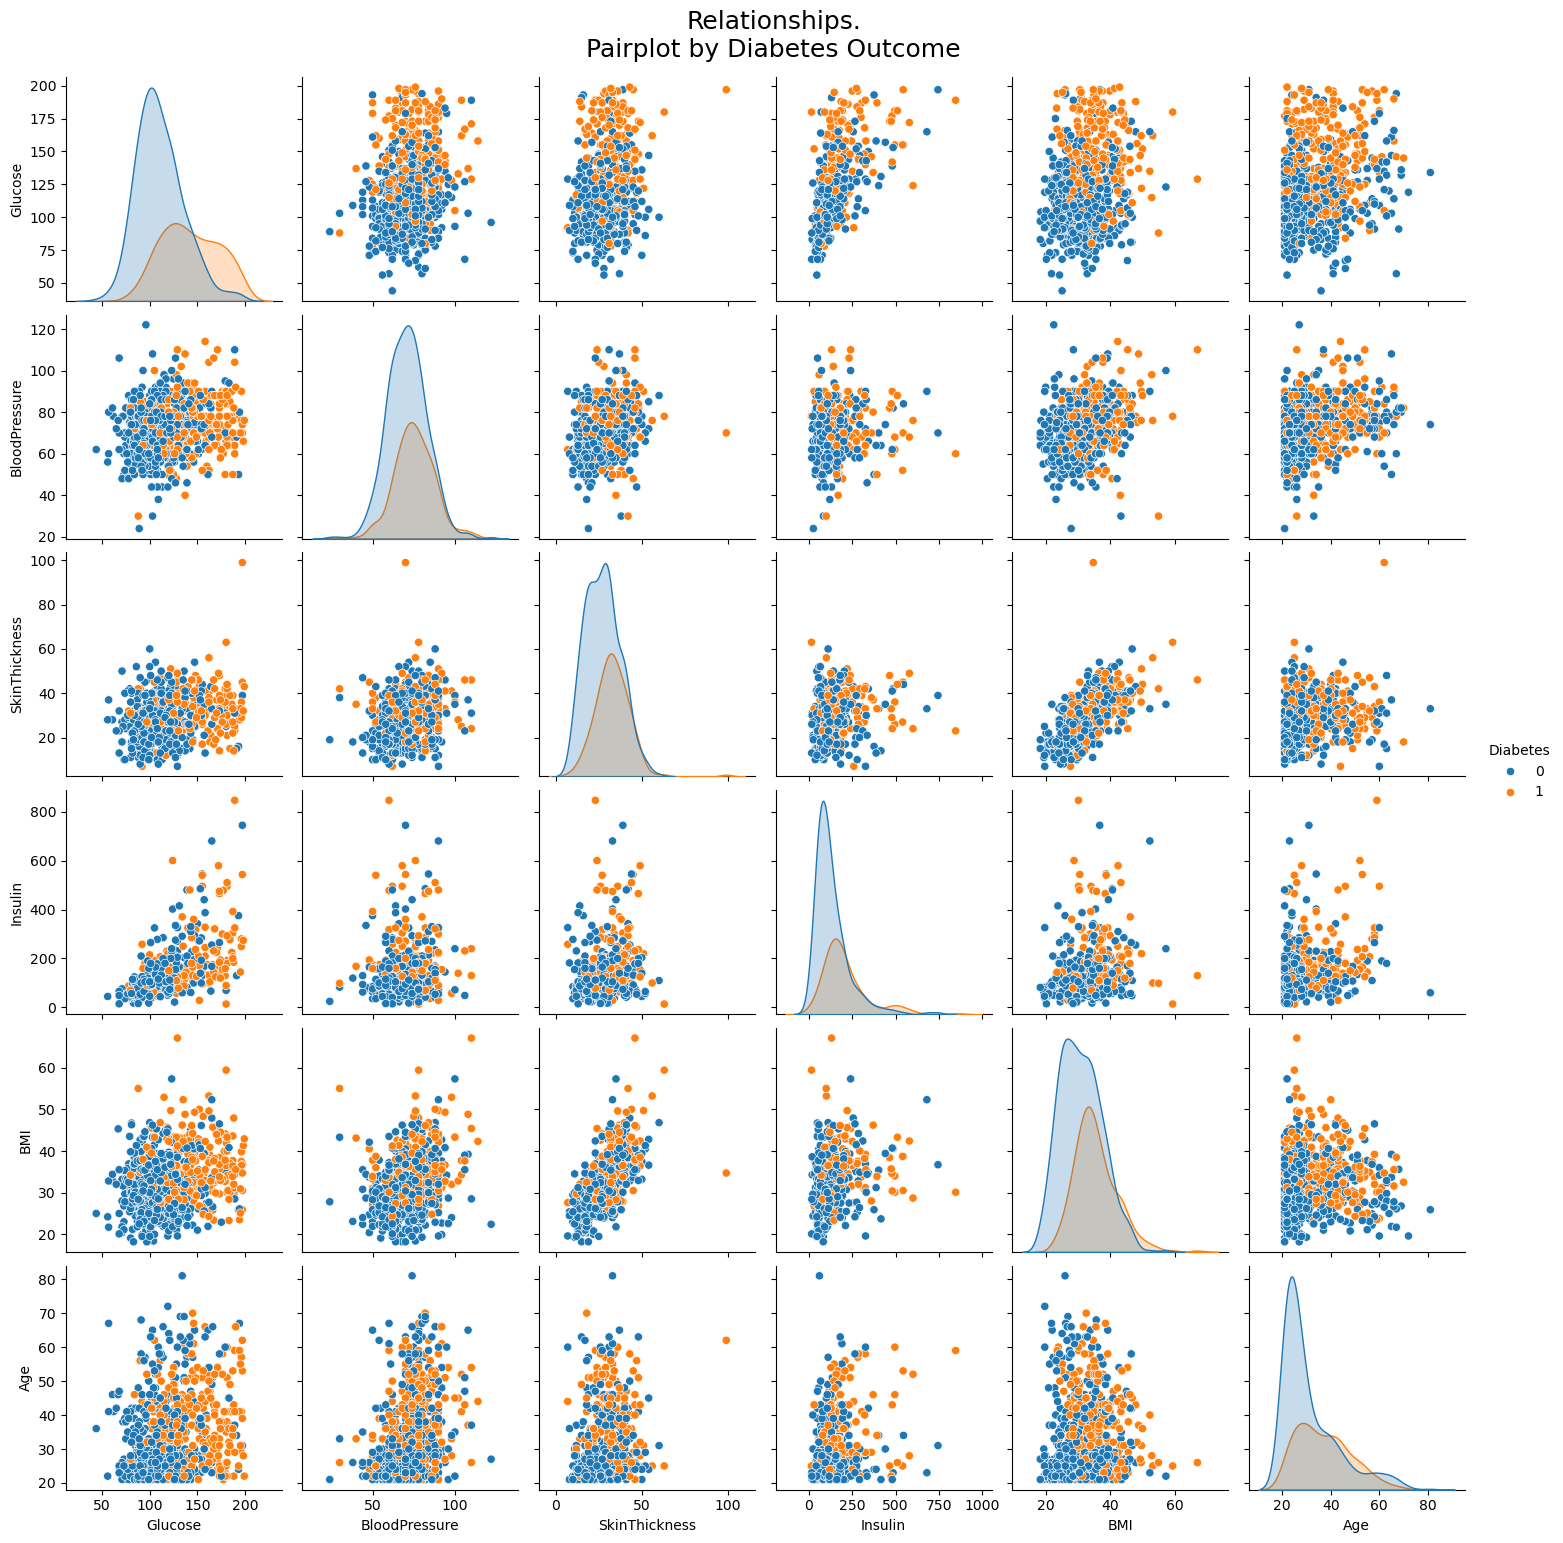

In [21]:

pp = sns.pairplot(dd[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Diabetes']],
                  hue='Diabetes',  palette=['C0', 'C1'])
pp.fig.suptitle('Relationships.\nPairplot by Diabetes Outcome', fontsize=18, y=1.03)
#pp.savefig('Pairplot for Relationships (Colored by Diabetes).png')
plt.show()

1. There is a Sweet Correlation Between Glucose and Positive Diabetes Diagnose
2. Higher BMI score Suggests Higher Risk of Diabetes After BMI 50, the Risk is Nearly 90%
3. After Age 30 Chance of Staying Healthy Decreases Dramatically  
4. With Higher BloodPressure Chance of Diabetes Increases very slightly  
5. Higher levels of SkinThickness and Insulin from Median, Increases Chance of Diabetes very slight  

#### 4.5: Countplot for Target Balance

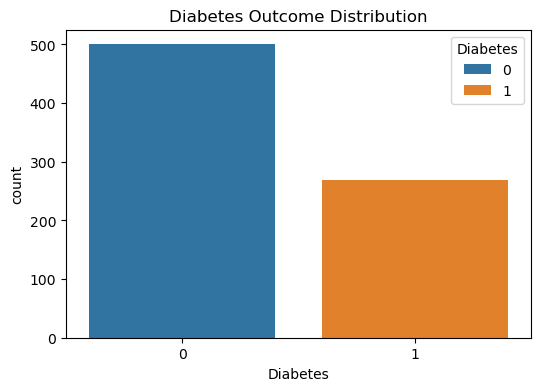

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes', data=df_clean, hue='Diabetes', palette=['C0','C1'])
plt.title('Diabetes Outcome Distribution')
plt.savefig('Diabetes Outcome')
plt.show()

The Diabetes Outcome Distribution Shows a Imbalanced Dataset, I Will Take Care of That in ML Part.

#### Save Modified Dataset

In [23]:
df_clean.to_csv('df_clean.csv', index=False)